<a href="https://colab.research.google.com/github/rogacky11/WineQT_neural_network/blob/main/WineQT_podzia%C5%82_2_kategorie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras import models, layers
import matplotlib.pyplot as plt

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')



---


1.   Wczytanie danych z pliku CSV 'WineQT.csv' do zmiennej df.
2.   Usunięcie kolumny 'Id', która jest zbędną informacją.
3.   Wyświetlenie pierwszych 10 wierszy.

In [6]:
df = pd.read_csv('WineQT.csv')
df = df.drop('Id', axis=1)
df.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5




---


1.   Zdefiniowanie funkcji 'map_quality', która odejmuje od wartości w kolumnie 'quality' wartość 3.
2.   Normalizacja danych w tej kolumnie.


In [7]:
# def map_quality(value):
#     return value - 3

In [8]:
# df['quality'] = df['quality'].map(map_quality)




---


1.   Podzielenie danych na cechy 'X' i etykiety 'Y'.
2.   Przekształcenie ich do postaci tablicy wartości za pomocą '.values'.



In [9]:
X = df.drop('quality', axis = 1)
X = X.values

Y = df['quality']
Y = Y.values

In [10]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [11]:
print(Y[:20])
bins = [0, 5.5, 8]
labels = ['bad','good']
Y = pd.cut(Y, bins = bins, labels = labels)
print(Y[:20])

[5 5 5 6 5 5 5 7 7 5 5 5 7 6 5 5 5 6 5 5]
['bad', 'bad', 'bad', 'good', 'bad', ..., 'bad', 'bad', 'good', 'bad', 'bad']
Length: 20
Categories (2, object): ['bad' < 'good']


In [12]:
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y[:20])

[0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0]


In [13]:
sc = StandardScaler()
sc.fit_transform(X)
X.shape

(1143, 11)

In [14]:
Y.shape

(1143,)



---


Podział danych na zbiory treningowe i testowe (x_train, x_test, y_train, y_test) używając funkcji train_test_split z biblioteki Scikit-Learn.




In [15]:
from sklearn.model_selection import train_test_split
x_train_tosplit, x_test, y_train_tosplit, y_test = train_test_split(X, Y, test_size=.2, shuffle=True,  random_state=50)
x_train, x_val, y_train, y_val = train_test_split(x_train_tosplit, y_train_tosplit, test_size=.2, shuffle=True,  random_state=50)

In [16]:
print(X.shape, x_train.shape, x_test.shape, x_val.shape)
# print(Y.shape, y_train.shape, y_test.shape)


(1143, 11) (731, 11) (229, 11) (183, 11)


In [17]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [18]:
print(y_test)

[1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0
 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 0 1]




---

Zamiana etykiet na kodowanie kategoryczne za pomocą to_categorical z Kerasa.

In [19]:
print(y_train[:10], y_test[:10])
one_hot_train_y = to_categorical(y_train)
one_hot_test_y = to_categorical(y_test)
print(one_hot_train_y[:5], one_hot_test_y[:5])

one_hot_val_y = to_categorical(y_val)
# print(one_hot_val_y[:1])

[1 1 1 1 0 0 0 0 1 0] [1 1 0 1 0 0 0 0 1 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]] [[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]




---

Definicja modelu sieci neuronowej za pomocą Kerasa, składającego się z warstw gęstych (Dense) z funkcją aktywacji ReLU i warstwy wyjściowej z funkcją aktywacji sigmoidalnej.

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (11,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(2, activation = 'sigmoid'))

In [21]:
# from keras.callbacks import EarlyStopping, LearningRateScheduler

# early_stopping = EarlyStopping(monitor='val_loss',
#                                patience=3,
#                                restore_best_weights=True,
#                                mode='min',
#                               )



---
Kompilacja modelu z wybranym optymalizatorem, funkcją straty i metrykami do monitorowania podczas trenowania.


In [22]:
model.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics = ['acc'])
model.summary()
history = model.fit(x_train, one_hot_train_y, epochs = 1000, validation_data=(x_val, one_hot_val_y), batch_size = 90)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,298
Trainable params: 1,298
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
9/9 [==============================] - 3s 73ms/step - loss: 1.0480 - acc: 0.3639 - val_loss: 0.8532 - val_acc: 0.3934
Epoch 2/1000
9/9 [==============================] - 0s 



---


Użycie wytrenowanego modelu do przewidywania etykiet na danych testowych.

In [23]:
result = model.predict(x_test)

8/8 [==============================] - 0s 3ms/step




---


1.   Wybranie indeksu z największą wartością z wyników przewidywań, aby otrzymać końcową etykietę.
2.   Wyliczenie i wyświetlenie dokładności przewidywań modelu.





In [24]:
prediction = np.argmax(result, axis = 1)
proc = prediction[prediction==y_test]
print(len(proc)/len(y_test))

0.7292576419213974


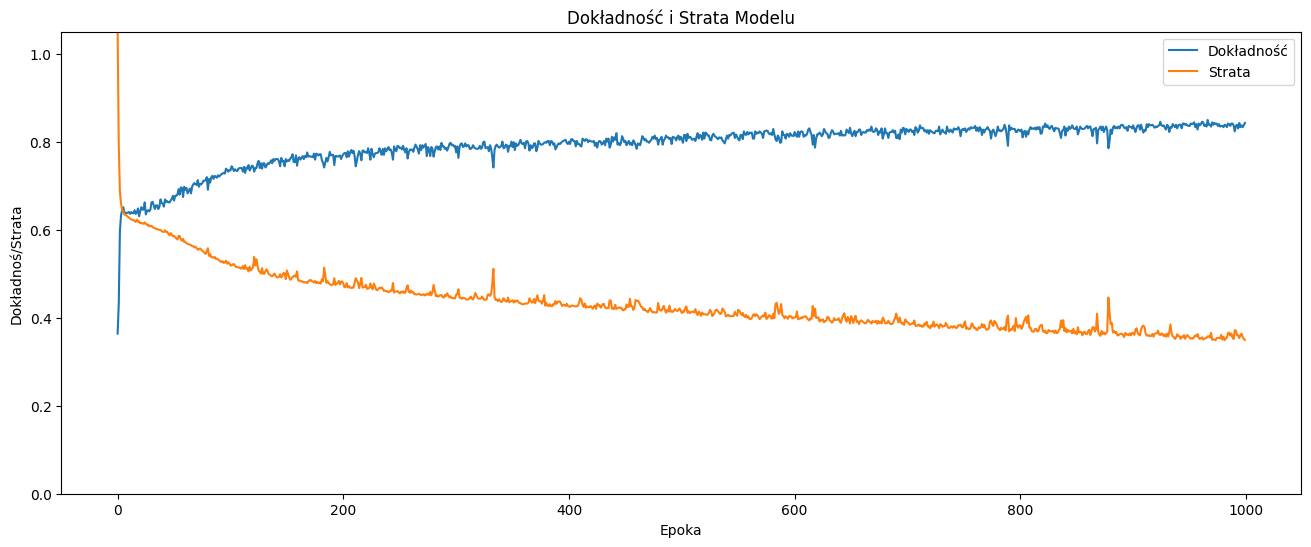

In [25]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

plt.figure(figsize=(16, 6))

# Wykres historii dokładności i straty
plt.plot(history.history['acc'], label='Dokładność')
plt.title('Dokładność i Strata Modelu')
plt.ylabel('Dokładnoś/Strata')
plt.xlabel('Epoka')
plt.ylim([0.0, 1.05])
plt.plot(history.history['loss'], label='Strata')

plt.legend()
plt.show()



---

Funkcja szukająca nalepszych parametrów dla modelu

In [26]:
# from keras.callbacks import EarlyStopping, LearningRateScheduler

# early_stopping = EarlyStopping(monitor='val_loss',
#                                patience=3,
#                                restore_best_weights=True,
#                                mode='min',
#                               )

In [27]:
# from itertools import product

# def best_network_config(x_train, y_train, x_test, y_test, x_val, y_val, layers_range, neurons_range, epochs=10, batch_size=32):
#     best_accuracy = 0.0
#     best_config = None
#     accuracy_data = []

#     for num_layers in range(layers_range[0], layers_range[1] + 1):
#         layer_data = []

#         for neurons_list in product(range(neurons_range[0], neurons_range[1] + 1), repeat=num_layers):
#             print("Training model with {} layers and neurons per layer: {}...".format(num_layers,neurons_list))

#             # Model
#             model = models.Sequential()
#             model.add(layers.Dense(neurons_list[0], activation='relu', input_shape=(11,)))
#             for neurons in neurons_list[1:]:
#                 model.add(layers.Dense(neurons, activation='relu'))
#             model.add(layers.Dense(6, activation='sigmoid'))

#             # Kompilacja
#             model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
#             history = model.fit(x_train, one_hot_train_y, epochs=epochs, validation_data=(x_val, one_hot_val_y),  batch_size=batch_size, verbose=1, callbacks = [early_stopping])

#             # Test
#             loss, accuracy = model.evaluate(x_test, y_test)
#             print("Test accuracy for {} layers and neurons per layer {}: {}\n".format(num_layers,neurons_list,accuracy))

#             # Zapis
#             layer_data.append((neurons_list, accuracy))

#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_config = (num_layers, neurons_list)

#         accuracy_data.append(layer_data)

#     print("Best configuration found: {} with accuracy: {}".format(best_config, best_accuracy))
#     return best_config, best_accuracy, accuracy_data


In [28]:
# layers_range = (1, 3)
# neurons_range = (64, 72)

# best_config, best_accuracy, accuracy_data = best_network_config(x_train, one_hot_train_y, x_test, one_hot_test_y, x_val, one_hot_val_y, layers_range, neurons_range)


In [29]:
# print(best_config)
# print(best_accuracy)
# print(accuracy_data[2])